# infertility model

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
df = pd.read_csv('infertility.csv')

In [180]:
df

,SEQN,WTSH2YR,LBXBPB,LBDBPBSI,LBDBPBLC,LBXBCD,LBDBCDSI,LBDBCDLC,LBXTHG,LBDTHGSI,...,DMDMARTL,RIDEXPRG,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,INDHHIN2,INDFMIN2,INDFMPIR
0,83742.0,47895.820345,0.36,0.017,0.0,0.25,2.22,0.0,1.54,7.7,...,1.0,2.0,4.0,4.0,1.0,1.0,0.0,6.0,6.0,1.03
1,83751.0,31925.673558,0.19,0.009,0.0,0.21,1.87,0.0,0.20,1.0,...,NaN,NaN,6.0,6.0,1.0,2.0,2.0,4.0,4.0,0.58
2,83757.0,23503.398195,2.25,0.109,0.0,0.18,1.60,0.0,0.56,2.8,...,4.0,NaN,5.0,5.0,1.0,0.0,0.0,5.0,5.0,0.77
3,83759.0,41519.629693,0.33,0.016,0.0,0.19,1.69,0.0,0.47,2.3,...,NaN,NaN,3.0,3.0,0.0,0.0,0.0,7.0,7.0,1.74
4,83761.0,36124.798936,1.80,0.087,0.0,1.11,9.88,0.0,3.22,16.1,...,5.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,93668.0,30322.313095,0.74,0.036,0.0,0.28,2.49,0.0,0.31,1.5,...,2.0,NaN,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.35
1549,93672.0,19715.131567,0.41,0.020,0.0,0.33,2.94,0.0,0.88,4.4,...,1.0,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.20
1550,93679.0,42681.553607,1.00,0.048,0.0,0.38,3.38,0.0,0.29,1.4,...,2.0,NaN,3.0,3.0,0.0,0.0,1.0,9.0,9.0,2.98
1551,93686.0,78091.970295,0.33,0.016,0.0,0.16,1.42,0.0,0.28,1.4,...,NaN,NaN,5.0,5.0,0.0,3.0,0.0,8.0,8.0,1.58


In [181]:
df.columns.tolist()

['SEQN',
 'WTSH2YR',
 'LBXBPB',
 'LBDBPBSI',
 'LBDBPBLC',
 'LBXBCD',
 'LBDBCDSI',
 'LBDBCDLC',
 'LBXTHG',
 'LBDTHGSI',
 'LBDTHGLC',
 'LBXBSE',
 'LBDBSESI',
 'LBDBSELC',
 'LBXBMN',
 'LBDBMNSI',
 'LBDBMNLC',
 'RHQ010',
 'RHQ020',
 'RHQ031',
 'RHD043',
 'RHQ060',
 'RHQ070',
 'RHQ074',
 'RHQ076',
 'RHQ078',
 'RHQ131',
 'RHD143',
 'RHQ160',
 'RHQ162',
 'RHQ163',
 'RHQ166',
 'RHQ169',
 'RHQ172',
 'RHD173',
 'RHQ171',
 'RHD180',
 'RHD190',
 'RHQ197',
 'RHQ200',
 'RHD280',
 'RHQ291',
 'RHQ305',
 'RHQ332',
 'RHQ420',
 'RHQ540',
 'RHQ542A',
 'RHQ542B',
 'RHQ542C',
 'RHQ542D',
 'RHQ554',
 'RHQ560Q',
 'RHQ560U',
 'RHQ570',
 'RHQ576Q',
 'RHQ576U',
 'RHQ580',
 'RHQ586Q',
 'RHQ586U',
 'RHQ596',
 'RHQ602Q',
 'RHQ602U',
 'RIAGENDR',
 'RIDAGEYR',
 'RIDAGEMN',
 'RIDRETH1',
 'RIDRETH3',
 'DMQMILIZ',
 'DMQADFC',
 'DMDBORN4',
 'DMDCITZN',
 'DMDYRSUS',
 'DMDEDUC3',
 'DMDEDUC2',
 'DMDMARTL',
 'RIDEXPRG',
 'DMDHHSIZ',
 'DMDFMSIZ',
 'DMDHHSZA',
 'DMDHHSZB',
 'DMDHHSZE',
 'INDHHIN2',
 'INDFMIN2',
 'INDFMPIR']

In [182]:
col_map = {
    "SEQN": "id",
    'WTSH2YR':"Blood metal weights",
    'LBXBPB':"lead_ugdl",
    'LBDBPBSI':"lead2",
    'LBDBPBLC':"leadcc",
    'LBXBCD':"cadmium_ugl",
    'LBDBCDSI':"cadmium2",
    'LBDBCDLC':"cadmiumcc",
    'LBXTHG':"mercury_ugl",
    'LBDTHGSI':"mercury2",
    'LBDTHGLC':"mercurycc",
    'LBXBSE':"selenium_ugl",
    'LBDBSESI':"selenium2",
    'LBDBSELC':"seleniumcc",
    'LBXBMN':"manganese_ugl",
    'LBDBMNSI':"manganese2",
    'LBDBMNLC':"manganesecc",
    'RHQ010':"first_period_age",
    'RHQ020':"first_period_age_range",
    'RHQ031':"regular_periods",
    'RHD043':"no_period_reason",
    'RHQ060':"last_period_age",
    'RHQ070':"last_period_age_range",
    'RHQ074':"infertility_1yr",
    'RHQ076':"infertility_treated",
    'RHQ078':"pelvic_infection",
    'RHQ131':"ever_pregnant",
    'RHD143':"pregnant_now",
    'RHQ160':"pregnant_times",
    'RHQ162':"pregnant_diabaetes",
    'RHQ163':"pregnant_diabaetes_age",
    'RHQ166':"vaginal_deliveries",
    'RHQ169':"cesarean_deliveries",
    'RHQ172':"baby_weight_high",
    'RHD173':"baby_weight_high_age",
    'RHQ171':"live_births",
    'RHD180':"first_live_birth_age",
    'RHD190':"last_live_birth_age",
    'RHQ197':"months_ago_last_birth",
    'RHQ200':"breastfeeding",
    'RHD280':"hysterectomy",
    'RHQ291':"hysterectomy_age",
    'RHQ305':"ovaries_removed",
    'RHQ332':"ovaries_removed_age",
    'RHQ420':"birth_control",
    'RHQ540':"female_hormones",
    'RHQ542A':"hormone_pills",
    'RHQ542B':"hormone_patches",
    'RHQ542C':"hormone_creams_injections",
    'RHQ542D':"hormonne_other",
    'RHQ554':"hormone_pills_estrogen_only",
    'RHQ560Q':"hormone_pills_estrogen_only_duration",
    'RHQ560U':"hormone_pills_estrogen_only_duration_units",
    'RHQ570':"hormone_pills_estrogen_progestin",
    'RHQ576Q':"hormone_pills_estrogen_progestin_duration",
    'RHQ576U':"hormone_pills_estrogen_progestin_duration_units",
    'RHQ580':"hormone_patches_estrogen_only",
    'RHQ586Q':"hormone_patches_estrogen_only_duration",
    'RHQ586U':"hormone_patches_estrogen_only_duration_units",
    'RHQ596':"hormone_patches_estrogen_progestin",
    'RHQ602Q':"hormone_patches_estrogen_progestin_duration",
    'RHQ602U':"hormone_patches_estrogen_progestin_duration_units",
    'RIAGENDR':"gender",
    'RIDAGEYR':"age_years",
    'RIDAGEMN':"age_months(<24months)",
    'RIDRETH1':"race",
    'RIDRETH3':"race_w_asian",
    'DMQMILIZ':"military_service",
    'DMQADFC':"foriegn_service",
    'DMDBORN4':"country_birth",
    'DMDCITZN':"us_citizenship",
    'DMDYRSUS':"time_in_us",
    'DMDEDUC3':"ed_level_child",
    'DMDEDUC2':"ed_level_adult",
    'DMDMARTL':"marital_status",
    'RIDEXPRG':"pregnancy_status",
    'DMDHHSIZ':"household_size",
    'DMDFMSIZ':"family_size",
    'DMDHHSZA':"children_0_5",
    'DMDHHSZB':"children_6_17",
    'DMDHHSZE':"adults_60_up",
    'INDHHIN2':"household_income",
    'INDFMIN2':"family_income",
    'INDFMPIR':"income_poverty_ratio",
}

# Apply the mapping
df = df.rename(columns=col_map)

In [183]:
df.info()
df.dtypes
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 84 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   id                                                 1553 non-null   float64
 1   Blood metal weights                                1553 non-null   float64
 2   lead_ugdl                                          1467 non-null   float64
 3   lead2                                              1467 non-null   float64
 4   leadcc                                             1467 non-null   float64
 5   cadmium_ugl                                        1467 non-null   float64
 6   cadmium2                                           1467 non-null   float64
 7   cadmiumcc                                          1467 non-null   float64
 8   mercury_ugl                                        1467 non-null   float64
 9   mercury2

(1553, 84)

In [184]:
df.describe()

,id,Blood metal weights,lead_ugdl,lead2,leadcc,cadmium_ugl,cadmium2,cadmiumcc,mercury_ugl,mercury2,...,marital_status,pregnancy_status,household_size,family_size,children_0_5,children_6_17,adults_60_up,household_income,family_income,income_poverty_ratio
count,1553.000000,1553.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.00000,1467.000000,...,1253.000000,521.000000,1553.000000,1553.000000,1553.000000,1553.000000,1553.000000,1514.000000,1515.000000,1401.000000
mean,88649.737283,82020.916101,0.955160,0.046121,0.002045,0.424342,3.775228,0.069530,1.22514,6.102522,...,2.711093,1.990403,3.520927,3.412750,0.292337,0.895042,0.542820,11.147952,10.897030,2.317288
std,2871.006933,80044.173485,0.799002,0.038599,0.045191,0.462756,4.117290,0.254439,1.97873,9.877289,...,1.868140,0.273693,1.771330,1.826641,0.603511,1.194891,0.778001,15.083045,15.137981,1.560725
min,83742.000000,0.000000,0.050000,0.002000,0.000000,0.070000,0.620000,0.000000,0.20000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,86115.000000,34481.675913,0.440000,0.021000,0.000000,0.180000,1.600000,0.000000,0.37000,1.800000,...,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,5.000000,5.000000,1.050000
50%,88677.000000,51178.831145,0.720000,0.035000,0.000000,0.280000,2.490000,0.000000,0.66000,3.300000,...,2.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,8.000000,8.000000,1.860000
75%,91112.000000,99123.231227,1.180000,0.057000,0.000000,0.480000,4.270000,0.000000,1.30000,6.500000,...,5.000000,2.000000,5.000000,5.000000,0.000000,2.000000,1.000000,14.000000,14.000000,3.510000
max,93689.000000,499733.238160,7.630000,0.369000,1.000000,5.140000,45.730000,1.000000,34.91000,174.200000,...,6.000000,3.000000,7.000000,7.000000,3.000000,4.000000,3.000000,99.000000,99.000000,5.000000


In [185]:
missing_data = df.isnull().sum()
missing_data[missing_data > 0]

lead_ugdl                 86
lead2                     86
leadcc                    86
cadmium_ugl               86
cadmium2                  86
                        ... 
marital_status           300
pregnancy_status        1032
household_income          39
family_income             38
income_poverty_ratio     152
Length: 71, dtype: int64

In [186]:
missing_per_row = pd.DataFrame({
    'column_name': df.columns,
    'missing_count': df.isnull().sum(axis=0)
})
missing_per_row


,column_name,missing_count
id,id,0
Blood metal weights,Blood metal weights,0
lead_ugdl,lead_ugdl,86
lead2,lead2,86
leadcc,leadcc,86
...,...,...
children_6_17,children_6_17,0
adults_60_up,adults_60_up,0
household_income,household_income,39
family_income,family_income,38


In [187]:
# Calculate the number of missing values per row
missing_per_row = df.isnull().sum(axis=1)

# Determine the threshold for 50% missing values
threshold = df.shape[1] / 2

# Identify rows with more than 50% missing values
rows_with_missing_data = df[missing_per_row > threshold]

# Display the number of such rows
print(f"Number of rows with more than 50% missing values: {rows_with_missing_data.shape[0]}")

Number of rows with more than 50% missing values: 350


In [188]:
# Calculate the percentage of missing values per column
missing_percentage = df.isnull().mean() * 100

# Identify columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index

# Display the list of columns to drop
print("Columns with more than 50% missing values:")
print(columns_to_drop)

Columns with more than 50% missing values:
Index(['first_period_age_range', 'no_period_reason', 'last_period_age',
       'last_period_age_range', 'pregnant_now', 'pregnant_diabaetes_age',
       'cesarean_deliveries', 'baby_weight_high_age', 'months_ago_last_birth',
       'breastfeeding', 'hysterectomy_age', 'ovaries_removed_age',
       'hormone_pills', 'hormone_patches', 'hormone_creams_injections',
       'hormonne_other', 'hormone_pills_estrogen_only',
       'hormone_pills_estrogen_only_duration',
       'hormone_pills_estrogen_only_duration_units',
       'hormone_pills_estrogen_progestin',
       'hormone_pills_estrogen_progestin_duration',
       'hormone_pills_estrogen_progestin_duration_units',
       'hormone_patches_estrogen_only',
       'hormone_patches_estrogen_only_duration',
       'hormone_patches_estrogen_only_duration_units',
       'hormone_patches_estrogen_progestin',
       'hormone_patches_estrogen_progestin_duration',
       'hormone_patches_estrogen_progesti

In [189]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = missing / len(df) * 100
print(missing_percent.head(20))  # top 20 worst

age_months(<24months)                                100.000000
hormone_patches_estrogen_progestin_duration_units     99.806825
hormone_patches_estrogen_progestin_duration           99.806825
hormonne_other                                        99.613651
hormone_patches_estrogen_only_duration_units          99.420476
first_period_age_range                                99.420476
hormone_patches_estrogen_only_duration                99.420476
foriegn_service                                       99.227302
hormone_patches                                       98.969736
hormone_patches_estrogen_only                         98.969736
hormone_patches_estrogen_progestin                    98.969736
last_period_age_range                                 98.840953
hormone_pills_estrogen_progestin_duration             98.068255
hormone_pills_estrogen_progestin_duration_units       98.068255
hormone_creams_injections                             97.037991
breastfeeding                           

In [190]:
df = df.drop(columns=[
                      "hormone_pills_estrogen_only",
                      "hormone_pills_estrogen_only_duration",
                      "hormone_pills_estrogen_only_duration_units",
                      "hormone_pills_estrogen_progestin",
                      "hormone_pills_estrogen_progestin_duration",
                      "hormone_pills_estrogen_progestin_duration_units",
                      "hormone_patches_estrogen_only",
                      "hormone_patches_estrogen_only_duration",
                      "hormone_patches_estrogen_only_duration_units",
                      "hormone_patches_estrogen_progestin",
                      "hormone_patches_estrogen_progestin_duration",
                      "hormone_patches_estrogen_progestin_duration_units",
                      "age_months(<24months)",
                      "foriegn_service",
                      "military_service",
                      "hormone_pills",
                      "hormone_patches",
                      "hormone_creams_injections",
                      "hormonne_other",
                        "last_period_age_range",
                        "first_period_age_range",
                        "breastfeeding",
                        "race",
                        "id"
                      ])

In [191]:
df

,Blood metal weights,lead_ugdl,lead2,leadcc,cadmium_ugl,cadmium2,cadmiumcc,mercury_ugl,mercury2,mercurycc,...,marital_status,pregnancy_status,household_size,family_size,children_0_5,children_6_17,adults_60_up,household_income,family_income,income_poverty_ratio
0,47895.820345,0.36,0.017,0.0,0.25,2.22,0.0,1.54,7.7,0.0,...,1.0,2.0,4.0,4.0,1.0,1.0,0.0,6.0,6.0,1.03
1,31925.673558,0.19,0.009,0.0,0.21,1.87,0.0,0.20,1.0,1.0,...,NaN,NaN,6.0,6.0,1.0,2.0,2.0,4.0,4.0,0.58
2,23503.398195,2.25,0.109,0.0,0.18,1.60,0.0,0.56,2.8,0.0,...,4.0,NaN,5.0,5.0,1.0,0.0,0.0,5.0,5.0,0.77
3,41519.629693,0.33,0.016,0.0,0.19,1.69,0.0,0.47,2.3,0.0,...,NaN,NaN,3.0,3.0,0.0,0.0,0.0,7.0,7.0,1.74
4,36124.798936,1.80,0.087,0.0,1.11,9.88,0.0,3.22,16.1,0.0,...,5.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,30322.313095,0.74,0.036,0.0,0.28,2.49,0.0,0.31,1.5,0.0,...,2.0,NaN,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.35
1549,19715.131567,0.41,0.020,0.0,0.33,2.94,0.0,0.88,4.4,0.0,...,1.0,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.20
1550,42681.553607,1.00,0.048,0.0,0.38,3.38,0.0,0.29,1.4,0.0,...,2.0,NaN,3.0,3.0,0.0,0.0,1.0,9.0,9.0,2.98
1551,78091.970295,0.33,0.016,0.0,0.16,1.42,0.0,0.28,1.4,0.0,...,NaN,NaN,5.0,5.0,0.0,3.0,0.0,8.0,8.0,1.58


In [192]:
df.leadcc.unique()

array([ 0., nan,  1.])

In [193]:
for col in ['lead_ugdl', 'cadmium_ugl', 'mercury_ugl', 'selenium_ugl', 'manganese_ugl']:
    print(f"{col}: {df[col].isnull().sum()} missing values")

lead_ugdl: 86 missing values
cadmium_ugl: 86 missing values
mercury_ugl: 86 missing values
selenium_ugl: 87 missing values
manganese_ugl: 87 missing values


In [194]:
# constant LLOD and sqrt(2)
lead_llod = 0.05
cadmium_llod = 0.07
mercury_llod = 0.2
selenium_llod = 59.35
manganese_llod = 2.21

SQRT_2 = np.sqrt(2)

#lead
df.loc[
    ((df['leadcc'] == 1) | (df['leadcc'].isna())) & (df['lead_ugdl'].isna()),
    'lead_ugdl'
] = lead_llod / SQRT_2
#cadmium
df.loc[
    ((df['cadmiumcc'] == 1) | (df['cadmiumcc'].isna())) & (df['cadmium_ugl'].isna()),
    'cadmium_ugl'
] = cadmium_llod / SQRT_2
#mercury
df.loc[
    ((df['mercurycc'] == 1) | (df['mercurycc'].isna())) & (df['mercury_ugl'].isna()),
    'mercury_ugl'
] = mercury_llod / SQRT_2
#selenium
df.loc[
    ((df['seleniumcc'] == 1) | (df['seleniumcc'].isna())) & (df['selenium_ugl'].isna()),
    'selenium_ugl'
] = selenium_llod / SQRT_2
#manganese
df.loc[
    ((df['manganesecc'] == 1) | (df['manganesecc'].isna())) & (df['manganese_ugl'].isna()),
    'manganese_ugl'
] = manganese_llod / SQRT_2



In [195]:
for col in ['lead_ugdl', 'cadmium_ugl', 'mercury_ugl', 'selenium_ugl', 'manganese_ugl']:
    print(f"{col}: {df[col].isnull().sum()} missing values")

lead_ugdl: 0 missing values
cadmium_ugl: 0 missing values
mercury_ugl: 0 missing values
selenium_ugl: 0 missing values
manganese_ugl: 0 missing values


In [196]:
# constant LLOD and sqrt(2)
lead_llod = 0.002
cadmium_llod =0.62
mercury_llod = 1
selenium_llod = 0.75
manganese_llod = 40.23

SQRT_2 = np.sqrt(2)

#lead
df.loc[
    ((df['leadcc'] == 1) | (df['leadcc'].isna())) & (df['lead2'].isna()),
    'lead2'
] = lead_llod / SQRT_2
#cadmium
df.loc[
    ((df['cadmiumcc'] == 1) | (df['cadmiumcc'].isna())) & (df['cadmium2'].isna()),
    'cadmium2'
] = cadmium_llod / SQRT_2
#mercury
df.loc[
    ((df['mercurycc'] == 1) | (df['mercurycc'].isna())) & (df['mercury2'].isna()),
    'mercury2'
] = mercury_llod / SQRT_2
#selenium
df.loc[
    ((df['seleniumcc'] == 1) | (df['seleniumcc'].isna())) & (df['selenium2'].isna()),
    'selenium2'
] = selenium_llod / SQRT_2
#manganese
df.loc[
    ((df['manganesecc'] == 1) | (df['manganesecc'].isna())) & (df['manganese2'].isna()),
    'manganese2'
] = manganese_llod / SQRT_2



In [197]:
df.columns.tolist()

['Blood metal weights',
 'lead_ugdl',
 'lead2',
 'leadcc',
 'cadmium_ugl',
 'cadmium2',
 'cadmiumcc',
 'mercury_ugl',
 'mercury2',
 'mercurycc',
 'selenium_ugl',
 'selenium2',
 'seleniumcc',
 'manganese_ugl',
 'manganese2',
 'manganesecc',
 'first_period_age',
 'regular_periods',
 'no_period_reason',
 'last_period_age',
 'infertility_1yr',
 'infertility_treated',
 'pelvic_infection',
 'ever_pregnant',
 'pregnant_now',
 'pregnant_times',
 'pregnant_diabaetes',
 'pregnant_diabaetes_age',
 'vaginal_deliveries',
 'cesarean_deliveries',
 'baby_weight_high',
 'baby_weight_high_age',
 'live_births',
 'first_live_birth_age',
 'last_live_birth_age',
 'months_ago_last_birth',
 'hysterectomy',
 'hysterectomy_age',
 'ovaries_removed',
 'ovaries_removed_age',
 'birth_control',
 'female_hormones',
 'gender',
 'age_years',
 'race_w_asian',
 'country_birth',
 'us_citizenship',
 'time_in_us',
 'ed_level_child',
 'ed_level_adult',
 'marital_status',
 'pregnancy_status',
 'household_size',
 'family_size'

In [198]:
# df = df.drop(columns=[
#     'lead2', 'leadcc',
#     'cadmium2', 'cadmiumcc',
#     'mercury2', 'mercurycc',
#     'selenium2', 'seleniumcc',
#     'manganese2', 'manganesecc'
# ])

df = df.drop(columns=[
     'leadcc',
   'cadmiumcc',
'mercurycc',
   'seleniumcc',
  'manganesecc'
])

In [199]:
df.rename(columns={'race_w_asian': 'race'}, inplace=True)

In [200]:
df

,Blood metal weights,lead_ugdl,lead2,cadmium_ugl,cadmium2,mercury_ugl,mercury2,selenium_ugl,selenium2,manganese_ugl,...,marital_status,pregnancy_status,household_size,family_size,children_0_5,children_6_17,adults_60_up,household_income,family_income,income_poverty_ratio
0,47895.820345,0.36,0.017,0.25,2.22,1.54,7.7,196.72,2.50,8.88,...,1.0,2.0,4.0,4.0,1.0,1.0,0.0,6.0,6.0,1.03
1,31925.673558,0.19,0.009,0.21,1.87,0.20,1.0,175.14,2.22,15.21,...,NaN,NaN,6.0,6.0,1.0,2.0,2.0,4.0,4.0,0.58
2,23503.398195,2.25,0.109,0.18,1.60,0.56,2.8,257.70,3.27,9.71,...,4.0,NaN,5.0,5.0,1.0,0.0,0.0,5.0,5.0,0.77
3,41519.629693,0.33,0.016,0.19,1.69,0.47,2.3,221.21,2.81,9.28,...,NaN,NaN,3.0,3.0,0.0,0.0,0.0,7.0,7.0,1.74
4,36124.798936,1.80,0.087,1.11,9.88,3.22,16.1,190.46,2.42,14.35,...,5.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,30322.313095,0.74,0.036,0.28,2.49,0.31,1.5,176.82,2.25,7.45,...,2.0,NaN,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.35
1549,19715.131567,0.41,0.020,0.33,2.94,0.88,4.4,192.09,2.44,14.92,...,1.0,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.20
1550,42681.553607,1.00,0.048,0.38,3.38,0.29,1.4,204.27,2.59,7.37,...,2.0,NaN,3.0,3.0,0.0,0.0,1.0,9.0,9.0,2.98
1551,78091.970295,0.33,0.016,0.16,1.42,0.28,1.4,214.48,2.72,10.93,...,NaN,NaN,5.0,5.0,0.0,3.0,0.0,8.0,8.0,1.58


In [201]:
df.infertility_1yr.unique()

array([ 2., nan,  1.])

In [202]:
(df['infertility_1yr'] == 2).sum()

np.int64(793)

In [203]:
df['infertility_1yr'].isnull().sum()


np.int64(665)

In [204]:
# Identify rows where the condition is met
condition = (df['ever_pregnant'] == 1) | (df['pregnant_now'] == 1)

# infertility_1yr
df.loc[condition & df['infertility_1yr'].isna(), 'infertility_1yr'] = 2



In [205]:
df.dropna(subset=['infertility_1yr'], inplace=True)

In [206]:
df = df.drop('infertility_treated', axis=1)

In [207]:
(df['gender'] == 2).sum()

np.int64(1275)

In [208]:
df

,Blood metal weights,lead_ugdl,lead2,cadmium_ugl,cadmium2,mercury_ugl,mercury2,selenium_ugl,selenium2,manganese_ugl,...,marital_status,pregnancy_status,household_size,family_size,children_0_5,children_6_17,adults_60_up,household_income,family_income,income_poverty_ratio
0,47895.820345,0.36,0.017,0.25,2.22,1.54,7.7,196.72,2.50,8.88,...,1.0,2.0,4.0,4.0,1.0,1.0,0.0,6.0,6.0,1.03
2,23503.398195,2.25,0.109,0.18,1.60,0.56,2.8,257.70,3.27,9.71,...,4.0,NaN,5.0,5.0,1.0,0.0,0.0,5.0,5.0,0.77
3,41519.629693,0.33,0.016,0.19,1.69,0.47,2.3,221.21,2.81,9.28,...,NaN,NaN,3.0,3.0,0.0,0.0,0.0,7.0,7.0,1.74
4,36124.798936,1.80,0.087,1.11,9.88,3.22,16.1,190.46,2.42,14.35,...,5.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.00
6,88669.845261,0.91,0.044,0.61,5.43,0.71,3.5,234.33,2.98,9.77,...,2.0,NaN,1.0,1.0,0.0,0.0,1.0,7.0,7.0,3.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,50108.270576,2.82,0.136,0.12,1.07,0.29,1.4,137.49,1.75,10.37,...,1.0,2.0,2.0,2.0,0.0,0.0,0.0,99.0,99.0,NaN
1548,30322.313095,0.74,0.036,0.28,2.49,0.31,1.5,176.82,2.25,7.45,...,2.0,NaN,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.35
1549,19715.131567,0.41,0.020,0.33,2.94,0.88,4.4,192.09,2.44,14.92,...,1.0,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.20
1550,42681.553607,1.00,0.048,0.38,3.38,0.29,1.4,204.27,2.59,7.37,...,2.0,NaN,3.0,3.0,0.0,0.0,1.0,9.0,9.0,2.98


In [209]:
df.columns.tolist()

['Blood metal weights',
 'lead_ugdl',
 'lead2',
 'cadmium_ugl',
 'cadmium2',
 'mercury_ugl',
 'mercury2',
 'selenium_ugl',
 'selenium2',
 'manganese_ugl',
 'manganese2',
 'first_period_age',
 'regular_periods',
 'no_period_reason',
 'last_period_age',
 'infertility_1yr',
 'pelvic_infection',
 'ever_pregnant',
 'pregnant_now',
 'pregnant_times',
 'pregnant_diabaetes',
 'pregnant_diabaetes_age',
 'vaginal_deliveries',
 'cesarean_deliveries',
 'baby_weight_high',
 'baby_weight_high_age',
 'live_births',
 'first_live_birth_age',
 'last_live_birth_age',
 'months_ago_last_birth',
 'hysterectomy',
 'hysterectomy_age',
 'ovaries_removed',
 'ovaries_removed_age',
 'birth_control',
 'female_hormones',
 'gender',
 'age_years',
 'race',
 'country_birth',
 'us_citizenship',
 'time_in_us',
 'ed_level_child',
 'ed_level_adult',
 'marital_status',
 'pregnancy_status',
 'household_size',
 'family_size',
 'children_0_5',
 'children_6_17',
 'adults_60_up',
 'household_income',
 'family_income',
 'income_

In [210]:
missing_counts = df.isnull().sum()
print(missing_counts) 

Blood metal weights          0
lead_ugdl                    0
lead2                        0
cadmium_ugl                  0
cadmium2                     0
mercury_ugl                  0
mercury2                     0
selenium_ugl                 0
selenium2                    0
manganese_ugl                0
manganese2                   0
first_period_age             0
regular_periods              0
no_period_reason           637
last_period_age            633
infertility_1yr              0
pelvic_infection           387
ever_pregnant               62
pregnant_now               927
pregnant_times             247
pregnant_diabaetes         248
pregnant_diabaetes_age    1191
vaginal_deliveries         251
cesarean_deliveries        704
baby_weight_high           296
baby_weight_high_age      1093
live_births                296
first_live_birth_age       313
last_live_birth_age        316
months_ago_last_birth     1196
hysterectomy                67
hysterectomy_age          1025
ovaries_

In [211]:

# Impute missing as 0 (Still menstruating)
df['no_period_reason'] = df['no_period_reason'].fillna(0)

df['last_period_age'] = df['last_period_age'].fillna(0)

df['pelvic_infection'] = df['pelvic_infection'].fillna(0)


In [212]:
# Sentinel value for women with no live births
df.loc[df['live_births'] == 0, ['first_live_birth_age', 'last_live_birth_age']] = 0

# Impute remaining missing values with median
df['first_live_birth_age'] = df['first_live_birth_age'].fillna(df['first_live_birth_age'].median())
df['last_live_birth_age'] = df['last_live_birth_age'].fillna(df['last_live_birth_age'].median())

In [213]:
missing_counts = df.isnull().sum()
print(missing_counts) 

Blood metal weights          0
lead_ugdl                    0
lead2                        0
cadmium_ugl                  0
cadmium2                     0
mercury_ugl                  0
mercury2                     0
selenium_ugl                 0
selenium2                    0
manganese_ugl                0
manganese2                   0
first_period_age             0
regular_periods              0
no_period_reason             0
last_period_age              0
infertility_1yr              0
pelvic_infection             0
ever_pregnant               62
pregnant_now               927
pregnant_times             247
pregnant_diabaetes         248
pregnant_diabaetes_age    1191
vaginal_deliveries         251
cesarean_deliveries        704
baby_weight_high           296
baby_weight_high_age      1093
live_births                296
first_live_birth_age         0
last_live_birth_age          0
months_ago_last_birth     1196
hysterectomy                67
hysterectomy_age          1025
ovaries_

In [214]:
df.dtypes

Blood metal weights       float64
lead_ugdl                 float64
lead2                     float64
cadmium_ugl               float64
cadmium2                  float64
mercury_ugl               float64
mercury2                  float64
selenium_ugl              float64
selenium2                 float64
manganese_ugl             float64
manganese2                float64
first_period_age          float64
regular_periods           float64
no_period_reason          float64
last_period_age           float64
infertility_1yr           float64
pelvic_infection          float64
ever_pregnant             float64
pregnant_now              float64
pregnant_times            float64
pregnant_diabaetes        float64
pregnant_diabaetes_age    float64
vaginal_deliveries        float64
cesarean_deliveries       float64
baby_weight_high          float64
baby_weight_high_age      float64
live_births               float64
first_live_birth_age      float64
last_live_birth_age       float64
months_ago_las

In [215]:
cols = [
    'pregnant_now',
    'pregnant_diabaetes_age',
    'months_ago_last_birth',
    'baby_weight_high_age',
    'ed_level_child',
    'ovaries_removed_age',
    'time_in_us',
    'pregnancy_status',
    'cesarean_deliveries',
    'vaginal_deliveries',
    'hysterectomy_age',
    'pregnant_times',
    'pregnant_diabaetes',
    'baby_weight_high',
    'live_births',
    'household_income',
    'family_income',
    'household_size',         
'family_size',           
'children_0_5',
'children_6_17',          
'adults_60_up'        

]

df = df.drop(columns=cols)

In [216]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns


In [217]:
# Numeric
numeric_impute_cols = ['ever_pregnant', 'hysterectomy', 'ovaries_removed', 'birth_control', 'female_hormones', 'income_poverty_ratio', 'ed_level_adult']
for col in numeric_impute_cols:
    # df[col + '_missing'] = df[col].isnull().astype(int)
    df[col] = df[col].fillna(df[col].median())

# Categorical
categorical_impute_cols = ['marital_status', 'us_citizenship']
for col in categorical_impute_cols:
    # df[col + '_missing'] = df[col].isnull().astype(int)
    df[col] = df[col].fillna(df[col].mode()[0])

In [218]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd


metal_cols = [ 'lead_ugdl', 'cadmium_ugl', 'mercury_ugl', 'selenium_ugl', 'manganese_ugl']
X = df[metal_cols]
y = df['infertility_1yr']                  # Target column
X

,lead_ugdl,cadmium_ugl,mercury_ugl,selenium_ugl,manganese_ugl
0,0.36,0.25,1.54,196.72,8.88
2,2.25,0.18,0.56,257.70,9.71
3,0.33,0.19,0.47,221.21,9.28
4,1.80,1.11,3.22,190.46,14.35
6,0.91,0.61,0.71,234.33,9.77
...,...,...,...,...,...
1547,2.82,0.12,0.29,137.49,10.37
1548,0.74,0.28,0.31,176.82,7.45
1549,0.41,0.33,0.88,192.09,14.92
1550,1.00,0.38,0.29,204.27,7.37


In [219]:
# Calculate MI
mi_scores = mutual_info_classif(X, y, random_state=42)

# Convert to a DataFrame for better readability
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

print(mi_df)

         Feature  MI_Score
1    cadmium_ugl  0.002410
3   selenium_ugl  0.001175
0      lead_ugdl  0.000000
2    mercury_ugl  0.000000
4  manganese_ugl  0.000000


In [220]:
metal_cols2 = [ 'lead2', 'cadmium2', 'mercury2', 'selenium2', 'manganese2']
X = df[metal_cols2]
y = df['infertility_1yr']         
mi_scores = mutual_info_classif(X, y,  random_state=42)

# Convert to a DataFrame for better readability
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

print(mi_df)         


      Feature  MI_Score
0       lead2  0.005707
1    cadmium2  0.001995
3   selenium2  0.000255
2    mercury2  0.000000
4  manganese2  0.000000


In [221]:
X = df.drop(columns=['infertility_1yr'])
y = df['infertility_1yr']         
mi_scores = mutual_info_classif(X, y,  random_state=42)

# Convert to a DataFrame for better readability
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

print(mi_df)         

                 Feature  MI_Score
15      pelvic_infection  0.037905
24             age_years  0.030636
13      no_period_reason  0.024218
0    Blood metal weights  0.014912
29        marital_status  0.011132
14       last_period_age  0.008782
8              selenium2  0.007510
18   last_live_birth_age  0.005919
20       ovaries_removed  0.005828
21         birth_control  0.005278
26         country_birth  0.005276
19          hysterectomy  0.004944
27        us_citizenship  0.002933
12       regular_periods  0.002676
22       female_hormones  0.001483
7           selenium_ugl  0.000514
1              lead_ugdl  0.000355
11      first_period_age  0.000307
3            cadmium_ugl  0.000218
25                  race  0.000000
2                  lead2  0.000000
28        ed_level_adult  0.000000
4               cadmium2  0.000000
17  first_live_birth_age  0.000000
23                gender  0.000000
5            mercury_ugl  0.000000
16         ever_pregnant  0.000000
10            mangan

In [222]:
df[metal_cols2].describe()

,lead2,cadmium2,mercury2,selenium2,manganese2
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,0.047395,4.019208,6.445018,2.348815,189.585689
std,0.039598,4.316218,10.456000,0.496998,79.421926
min,0.001414,0.438406,0.707107,0.530330,28.446906
25%,0.023000,1.690000,1.900000,2.200000,144.340000
50%,0.036000,2.760000,3.500000,2.390000,178.560000
75%,0.059000,4.540000,6.750000,2.600000,226.980000
max,0.369000,45.730000,174.200000,4.830000,854.220000


In [223]:
df['infertility_1yr'].value_counts(normalize=True)

infertility_1yr
2.0    0.92549
1.0    0.07451
Name: proportion, dtype: float64

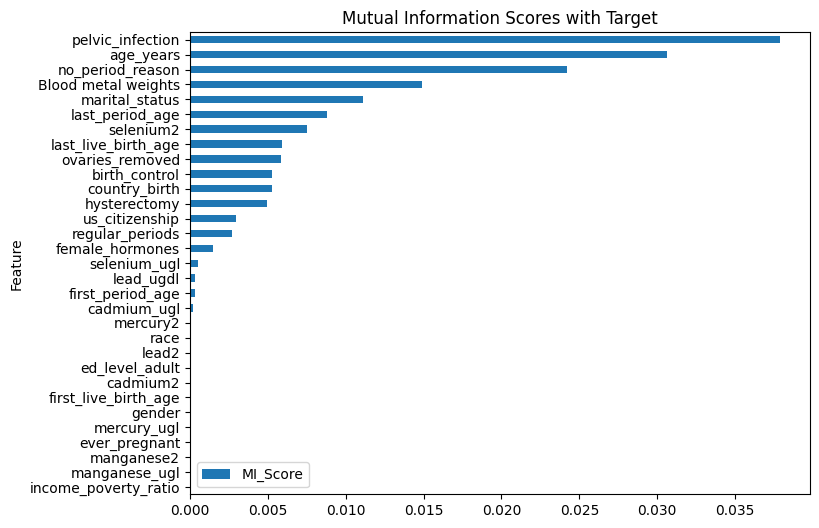

In [224]:
import matplotlib.pyplot as plt

mi_df.sort_values(by='MI_Score', ascending=True).plot.barh(x='Feature', y='MI_Score', figsize=(8, 6))
plt.title("Mutual Information Scores with Target")
plt.show()

In [225]:
df = df.drop(columns=[
     'ed_level_adult',
   'first_live_birth_age',
'gender',
   'ever_pregnant',
  'income_poverty_ratio',
  'first_period_age',
  'us_citizenship',
  'ovaries_removed'
])

In [226]:
df.isnull().sum()

Blood metal weights    0
lead_ugdl              0
lead2                  0
cadmium_ugl            0
cadmium2               0
mercury_ugl            0
mercury2               0
selenium_ugl           0
selenium2              0
manganese_ugl          0
manganese2             0
regular_periods        0
no_period_reason       0
last_period_age        0
infertility_1yr        0
pelvic_infection       0
last_live_birth_age    0
hysterectomy           0
birth_control          0
female_hormones        0
age_years              0
race                   0
country_birth          0
marital_status         0
dtype: int64

In [227]:
df

,Blood metal weights,lead_ugdl,lead2,cadmium_ugl,cadmium2,mercury_ugl,mercury2,selenium_ugl,selenium2,manganese_ugl,...,infertility_1yr,pelvic_infection,last_live_birth_age,hysterectomy,birth_control,female_hormones,age_years,race,country_birth,marital_status
0,47895.820345,0.36,0.017,0.25,2.22,1.54,7.7,196.72,2.50,8.88,...,2.0,2.0,29.0,2.0,1.0,2.0,32.0,1.0,2.0,1.0
2,23503.398195,2.25,0.109,0.18,1.60,0.56,2.8,257.70,3.27,9.71,...,2.0,2.0,38.0,1.0,2.0,2.0,57.0,2.0,1.0,4.0
3,41519.629693,0.33,0.016,0.19,1.69,0.47,2.3,221.21,2.81,9.28,...,2.0,2.0,29.0,2.0,2.0,2.0,19.0,1.0,1.0,1.0
4,36124.798936,1.80,0.087,1.11,9.88,3.22,16.1,190.46,2.42,14.35,...,2.0,2.0,29.0,2.0,2.0,2.0,24.0,6.0,2.0,5.0
6,88669.845261,0.91,0.044,0.61,5.43,0.71,3.5,234.33,2.98,9.77,...,2.0,0.0,31.0,2.0,1.0,2.0,80.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,50108.270576,2.82,0.136,0.12,1.07,0.29,1.4,137.49,1.75,10.37,...,1.0,2.0,29.0,2.0,2.0,2.0,29.0,6.0,2.0,1.0
1548,30322.313095,0.74,0.036,0.28,2.49,0.31,1.5,176.82,2.25,7.45,...,2.0,0.0,33.0,2.0,1.0,2.0,73.0,1.0,2.0,2.0
1549,19715.131567,0.41,0.020,0.33,2.94,0.88,4.4,192.09,2.44,14.92,...,2.0,0.0,37.0,2.0,2.0,2.0,63.0,2.0,2.0,1.0
1550,42681.553607,1.00,0.048,0.38,3.38,0.29,1.4,204.27,2.59,7.37,...,2.0,0.0,24.0,1.0,1.0,2.0,72.0,4.0,1.0,2.0


In [228]:
df.columns.tolist()

['Blood metal weights',
 'lead_ugdl',
 'lead2',
 'cadmium_ugl',
 'cadmium2',
 'mercury_ugl',
 'mercury2',
 'selenium_ugl',
 'selenium2',
 'manganese_ugl',
 'manganese2',
 'regular_periods',
 'no_period_reason',
 'last_period_age',
 'infertility_1yr',
 'pelvic_infection',
 'last_live_birth_age',
 'hysterectomy',
 'birth_control',
 'female_hormones',
 'age_years',
 'race',
 'country_birth',
 'marital_status']

In [229]:
# df = df.drop(columns=['regular_periods', 'no_period_reason', 'last_period_age', 'last_live_birth_age', 'country_birth'])

df = df.drop(columns=[ 'no_period_reason', 'last_live_birth_age'])

df.columns.tolist()

['Blood metal weights',
 'lead_ugdl',
 'lead2',
 'cadmium_ugl',
 'cadmium2',
 'mercury_ugl',
 'mercury2',
 'selenium_ugl',
 'selenium2',
 'manganese_ugl',
 'manganese2',
 'regular_periods',
 'last_period_age',
 'infertility_1yr',
 'pelvic_infection',
 'hysterectomy',
 'birth_control',
 'female_hormones',
 'age_years',
 'race',
 'country_birth',
 'marital_status']

In [230]:
df.columns.tolist()

['Blood metal weights',
 'lead_ugdl',
 'lead2',
 'cadmium_ugl',
 'cadmium2',
 'mercury_ugl',
 'mercury2',
 'selenium_ugl',
 'selenium2',
 'manganese_ugl',
 'manganese2',
 'regular_periods',
 'last_period_age',
 'infertility_1yr',
 'pelvic_infection',
 'hysterectomy',
 'birth_control',
 'female_hormones',
 'age_years',
 'race',
 'country_birth',
 'marital_status']

In [231]:
col_map = {

'Blood metal weights':'WTSH2YR',
 'lead_ugdl':'LBXBPB',
 'lead2':'LBDBPBSI' ,
 'cadmium_ugl':'LBXBCD',
 'cadmium2':'LBDBCDSI',
 'mercury_ugl': 'LBXTHG',
 'mercury2':'LBDTHGSI',
 'selenium_ugl': 'LBXBSE',
 'selenium2': 'LBDBSESI',
 'manganese_ugl': 'LBXBMN',
 'manganese2': 'LBDBMNSI',
 'regular_periods':'RHQ031',
 'last_period_age': 'RHQ060',
 'infertility_1yr':'RHQ074', 
 'pelvic_infection':'RHQ078',
 'hysterectomy': 'RHD280',
 'birth_control': 'RHQ420',
 'female_hormones': 'RHQ540',
 'age_years': 'RIDAGEYR',
 'race':"RIDRETH3",
 'country_birth': "DMDBORN4" ,
 'marital_status':'DMDMARTL'
}

# Apply the mapping
df = df.rename(columns=col_map)

In [232]:
df.columns.tolist()

['WTSH2YR',
 'LBXBPB',
 'LBDBPBSI',
 'LBXBCD',
 'LBDBCDSI',
 'LBXTHG',
 'LBDTHGSI',
 'LBXBSE',
 'LBDBSESI',
 'LBXBMN',
 'LBDBMNSI',
 'RHQ031',
 'RHQ060',
 'RHQ074',
 'RHQ078',
 'RHD280',
 'RHQ420',
 'RHQ540',
 'RIDAGEYR',
 'RIDRETH3',
 'DMDBORN4',
 'DMDMARTL']

In [233]:
# Export to CSV
df.to_csv('infertility_cleaned.csv', index=False)
print("Data exported successfully to 'infertility_cleaned.csv'")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Data exported successfully to 'infertility_cleaned.csv'
Rows: 1275, Columns: 22


In [234]:
# ==================== MODEL COMPARISON ON RISK CATEGORIES ONLY ==================== #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, 
    roc_curve, accuracy_score, precision_score, recall_score, f1_score
)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib

print("=" * 80)
print("MODEL COMPARISON: RISK CATEGORIES ONLY DATASET")
print("=" * 80)

# ==================== LOAD & PREPARE RISK DATASET ==================== #
df = pd.read_csv('infertility_cleaned.csv')

col_map = {
    'WTSH2YR': 'Blood metal weights',
    'LBXBPB': 'lead_ugdl',
    'LBDBPBSI': 'lead2',
    'LBXBCD': 'cadmium_ugl',
    'LBDBCDSI': 'cadmium2',
    'LBXTHG': 'mercury_ugl',
    'LBDTHGSI': 'mercury2',
    'LBXBSE': 'selenium_ugl',
    'LBDBSESI': 'selenium2',
    'LBXBMN': 'manganese_ugl',
    'LBDBMNSI': 'manganese2',
    'RHQ031': 'regular_periods',
    'RHQ060': 'last_period_age',
    'RHQ074': 'infertility_1yr',
    'RHQ078': 'pelvic_infection',
    'RHD280': 'hysterectomy',
    'RHQ420': 'birth_control',
    'RHQ540': 'female_hormones',
    'RIDAGEYR': 'age_years',
    'RIDRETH3': 'race',
    'DMDBORN4': 'country_birth',
    'DMDMARTL': 'marital_status'
}
df.rename(columns=col_map, inplace=True)

metal_cols_base = ['lead_ugdl', 'cadmium_ugl', 'mercury_ugl', 'selenium_ugl', 'manganese_ugl']
metal_cols_si = ['lead2', 'cadmium2', 'mercury2', 'selenium2', 'manganese2']

df_categorized = df.copy()

# Define risk thresholds
risk_thresholds = {
    'lead_ugdl': {'low': 1.0, 'medium': 2.0},
    'cadmium_ugl': {'low': 0.3, 'medium': 0.5},
    'mercury_ugl': {'low': 1.0, 'medium': 3.0},
    'selenium_ugl': {'low': 120, 'medium': 180},
    'manganese_ugl': {'low': 8.0, 'medium': 12.0}
}

# Create risk categories
for metal, thresholds in risk_thresholds.items():
    cat_col = metal.replace('_ugdl', '').replace('_ugl', '') + '_risk'
    df_categorized[cat_col] = pd.cut(
        df_categorized[metal],
        bins=[-np.inf, thresholds['low'], thresholds['medium'], np.inf],
        labels=[0, 1, 2]
    ).astype(int)

# Engineer risk features
df_categorized['toxic_risk_score'] = (
    df_categorized['lead_risk'] + 
    df_categorized['cadmium_risk'] + 
    df_categorized['mercury_risk']
)

df_categorized['multi_high_risk'] = (
    (df_categorized[['lead_risk', 'cadmium_risk', 'mercury_risk']] == 2).sum(axis=1) >= 2
).astype(int)

df_categorized['risk_imbalance'] = (
    ((df_categorized['lead_risk'] == 2).astype(int) +
     (df_categorized['cadmium_risk'] == 2).astype(int) +
     (df_categorized['mercury_risk'] == 2).astype(int)) -
    ((df_categorized['selenium_risk'] == 0).astype(int) +
     (df_categorized['manganese_risk'] == 0).astype(int))
)

df_categorized['high_lead_cadmium'] = (
    (df_categorized['lead_risk'] == 2) & 
    (df_categorized['cadmium_risk'] == 2)
).astype(int)

df_categorized['low_selenium_high_toxics'] = (
    (df_categorized['selenium_risk'] == 0) & 
    (df_categorized['toxic_risk_score'] >= 4)
).astype(int)

# Prepare Risk Categories Only dataset
risk_cols = ['lead_risk', 'cadmium_risk', 'mercury_risk', 'selenium_risk', 'manganese_risk']
engineered_risk_cols = ['toxic_risk_score', 'multi_high_risk', 'risk_imbalance', 
                        'high_lead_cadmium', 'low_selenium_high_toxics']

non_metal_cols = [col for col in df.columns if col not in metal_cols_base + metal_cols_si + ['infertility_1yr']]
X_risk_only = df_categorized[non_metal_cols + risk_cols + engineered_risk_cols]
y = df['infertility_1yr'].map({1: 1, 2: 0})

print(f"\nRisk Categories Dataset Shape: {X_risk_only.shape}")
print(f"   Features: {X_risk_only.shape[1]}")

# ==================== TRAIN-TEST SPLIT ==================== #
X_train, X_test, y_train, y_test = train_test_split(
    X_risk_only, y, test_size=0.2, random_state=42, stratify=y
)

# ==================== RESAMPLING ==================== #
smote = SMOTE(sampling_strategy=0.5, random_state=42)
under = RandomUnderSampler(sampling_strategy=1.0, random_state=42)

resample_pipeline = ImbPipeline(steps=[
    ('smote', smote),
    ('under', under)
])

X_train_resampled, y_train_resampled = resample_pipeline.fit_resample(X_train, y_train)

print(f"\nAfter Resampling: {X_train_resampled.shape}")
print(f"   Class Balance: {pd.Series(y_train_resampled).value_counts().to_dict()}")

# ==================== SCALING ==================== #
numeric_cols = X_train_resampled.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

X_train_scaled = X_train_resampled.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_resampled[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# ==================== DEFINE MODELS ==================== #
print("\n" + "=" * 80)
print("Training Multiple Models on Risk Categories Dataset")
print("=" * 80)

models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ),
    
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,
        subsample=0.8,
        random_state=42
    ),
    
    'XGBoost': XGBClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,
        scale_pos_weight=2,
        random_state=42,
        n_jobs=-1,
        eval_metric='logloss'
    ),
    
    'LightGBM': LGBMClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1,
        verbose=-1
    ),
    
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ),
    
    'Support Vector Machine': SVC(
        kernel='rbf',
        C=1.0,
        class_weight='balanced',
        probability=True,
        random_state=42
    )
}

# ==================== TRAIN & EVALUATE ALL MODELS ==================== #
results = []

for model_name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Training: {model_name}")
    print(f"{'='*60}")
    
    # Train
    model.fit(X_train_scaled, y_train_resampled)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\nResults:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc_auc:.4f}")
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'TN': tn,
        'FP': fp,
        'FN': fn,
        'TP': tp,
        'Trained_Model': model,
        'y_pred_proba': y_pred_proba
    })

# ==================== RESULTS COMPARISON ==================== #
print("\n" + "=" * 80)
print("MODEL COMPARISON RESULTS")
print("=" * 80)

results_df = pd.DataFrame(results)
print(results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].to_string(index=False))

# Best model by ROC-AUC
best_idx = results_df['F1-Score'].idxmax()
best_model_name = results_df.loc[best_idx, 'Model']
best_roc_auc = results_df.loc[best_idx, 'F1-Score']
best_model = results_df.loc[best_idx, 'Trained_Model']

print("\n" + "=" * 80)
print(f"BEST MODEL: {best_model_name}")
print(f"Best F1-Score: {best_roc_auc:.4f}")
print("=" * 80)


# ==================== SAVE BEST MODEL ==================== #
print("\n Saving best model...")

model_package = {
    'model': best_model,
    'scaler': scaler,
    'model_name': best_model_name,
    'feature_names': list(X_risk_only.columns),
    'performance': {
        'accuracy': float(results_df.loc[best_idx, 'Accuracy']),
        'precision': float(results_df.loc[best_idx, 'Precision']),
        'recall': float(results_df.loc[best_idx, 'Recall']),
        'f1_score': float(results_df.loc[best_idx, 'F1-Score']),
        'roc_auc': float(results_df.loc[best_idx, 'ROC-AUC'])
    }
}

joblib.dump(model_package, f'infertility_{best_model_name.replace(" ", "_").lower()}_risk_only.joblib')
joblib.dump(best_model, f'best_model_risk_only.joblib')
joblib.dump(scaler, f'scaler_risk_only.joblib')

# Save categorized dataset
df_categorized.to_csv('infertility_with_risk_categories.csv', index=False)

# Save results summary
results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].to_csv(
    'model_comparison_results.csv', index=False
)

print("Saved:")
print(f"  - Model package: infertility_{best_model_name.replace(' ', '_').lower()}_risk_only.joblib")
print(f"  - Best model: best_model_risk_only.joblib")
print(f"  - Scaler: scaler_risk_only.joblib")
print(f"  - Dataset: infertility_with_risk_categories.csv")
print(f"  - Results: model_comparison_results.csv")

print("\n" + "=" * 80)
print("MODEL COMPARISON COMPLETE!")
print("=" * 80)
print(f"\n Summary:")
print(f"  Best Model: {best_model_name}")
print(f"  F1-Score: {best_roc_auc:.4f}")
print(f"  Accuracy: {results_df.loc[best_idx, 'Accuracy']:.4f}")
print(f"  Recall: {results_df.loc[best_idx, 'Recall']:.4f}")
print("=" * 80)

MODEL COMPARISON: RISK CATEGORIES ONLY DATASET

Risk Categories Dataset Shape: (1275, 21)
   Features: 21

After Resampling: (944, 21)
   Class Balance: {0: 472, 1: 472}

Training Multiple Models on Risk Categories Dataset

Training: Random Forest

Results:
  Accuracy:  0.8784
  Precision: 0.2000
  Recall:    0.2105
  F1-Score:  0.2051
  ROC-AUC:   0.7580

Training: Gradient Boosting

Results:
  Accuracy:  0.8549
  Precision: 0.2000
  Recall:    0.3158
  F1-Score:  0.2449
  ROC-AUC:   0.7259

Training: XGBoost

Results:
  Accuracy:  0.8275
  Precision: 0.1951
  Recall:    0.4211
  F1-Score:  0.2667
  ROC-AUC:   0.7478

Training: LightGBM

Results:
  Accuracy:  0.8314
  Precision: 0.1471
  Recall:    0.2632
  F1-Score:  0.1887
  ROC-AUC:   0.7357

Training: Logistic Regression

Results:
  Accuracy:  0.6627
  Precision: 0.0964
  Recall:    0.4211
  F1-Score:  0.1569
  ROC-AUC:   0.6086

Training: Support Vector Machine

Results:
  Accuracy:  0.7804
  Precision: 0.1373
  Recall:    0.3684